# Project: Customer Churn Analysis
### Business Requirements:
Objective: Analyze customer data to identify factors contributing to customer churn and provide actionable recommendations to improve customer retention.

### Key Questions to Answer:

What are the main factors contributing to customer churn?  
Can we identify any patterns or trends in the churn behavior of different customer segments?  
How effective are our current retention strategies in retaining customers?  
What recommendations can we make to reduce churn rates and improve customer satisfaction?

In [2]:
#import relevant libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [4]:
churn = pd.read_csv('customer_churn.csv')
churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
churn.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

no NaN data

In [6]:
churn.duplicated().sum()

0

No duplicates

In [7]:
churn.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


No outliers appear to be present

In [8]:
churn.Gender.value_counts()

Gender
Female    34353
Male      30021
Name: count, dtype: int64

In [9]:
churn['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

In [10]:
churn['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

Appears to be no typos. Data set is clean.

In [12]:
churn.dtypes

CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object

To investigate which factors affect churn rate we will preform a logistic regression. Need to convert object fields into int fields:  
Gender: Male 1 Female 0  
Subscription Type: Standard 0 Basic 1 Premium 2  
Contract Length: Monthly 0 Quarterly 1 Annual 2

In [14]:
churn['Subscription Type'] = churn['Subscription Type'].map({'Standard': 0, 'Basic': 1, 'Premium': 2})

In [15]:
churn['Contract Length'] = churn['Contract Length'].map({'Monthly': 0, 'Quarterly': 1, 'Annual': 2})

In [16]:
churn['Gender']=churn['Gender'].map({'Male': 1, 'Female':0})

In [17]:
churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,1,0,598,9,1
1,2,41,0,28,28,7,13,0,0,584,20,0
2,3,47,1,27,10,2,29,2,2,757,21,0
3,4,35,1,9,12,5,17,2,1,232,18,0
4,5,53,0,58,24,9,2,0,2,533,18,0


Data is now ready to perform logistic regression.

In [21]:
y = churn.Churn
x1 = churn.drop(['Churn','CustomerID'],axis = 1)
x1.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,25,14,4,27,1,0,598,9
1,41,0,28,28,7,13,0,0,584,20
2,47,1,27,10,2,29,2,2,757,21
3,35,1,9,12,5,17,2,1,232,18
4,53,0,58,24,9,2,0,2,533,18


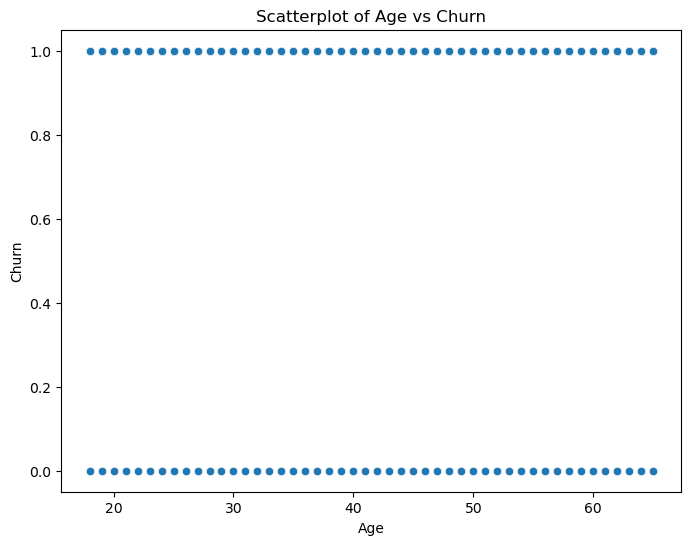

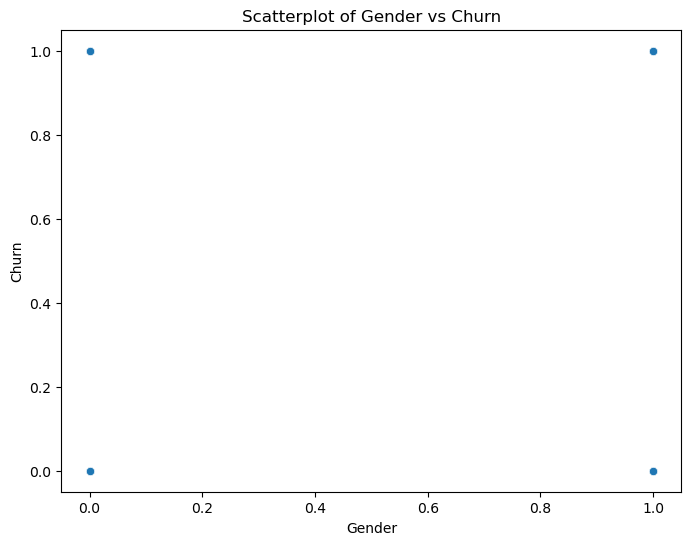

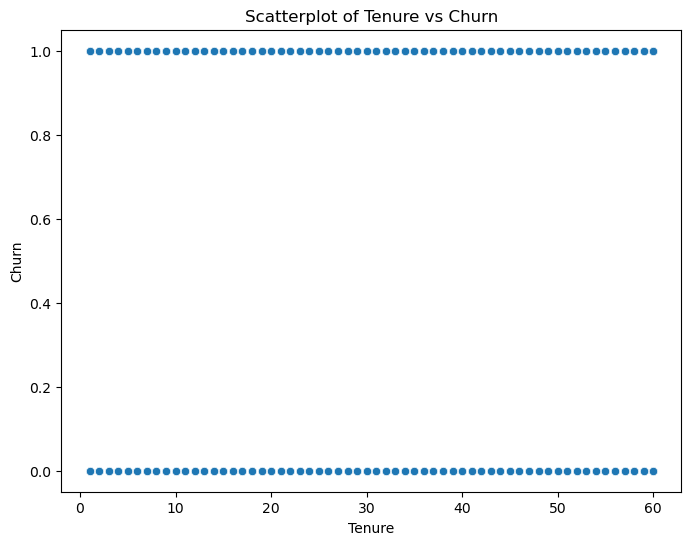

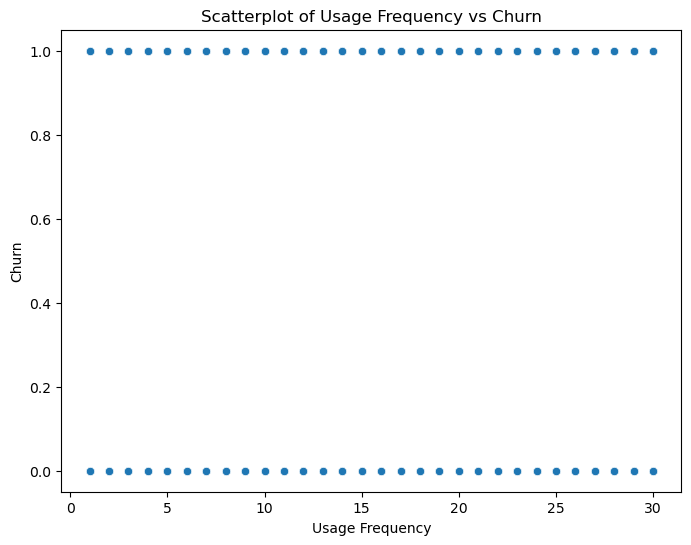

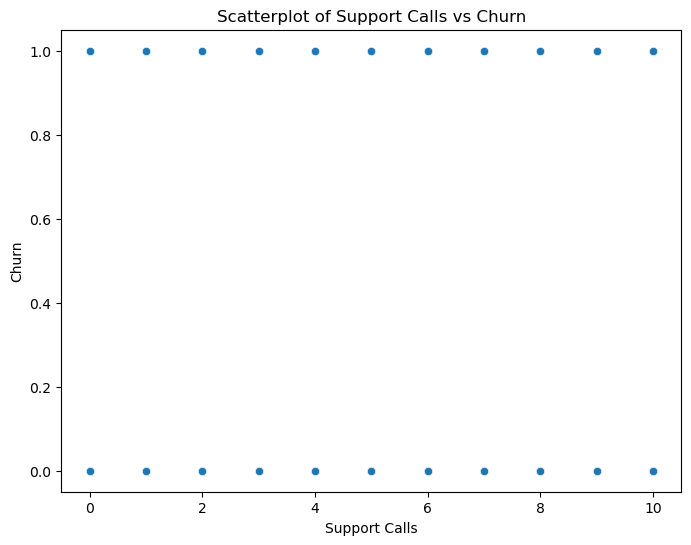

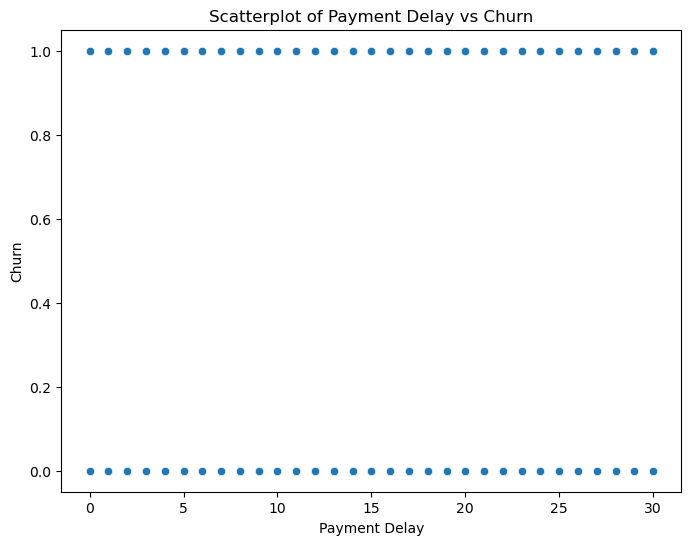

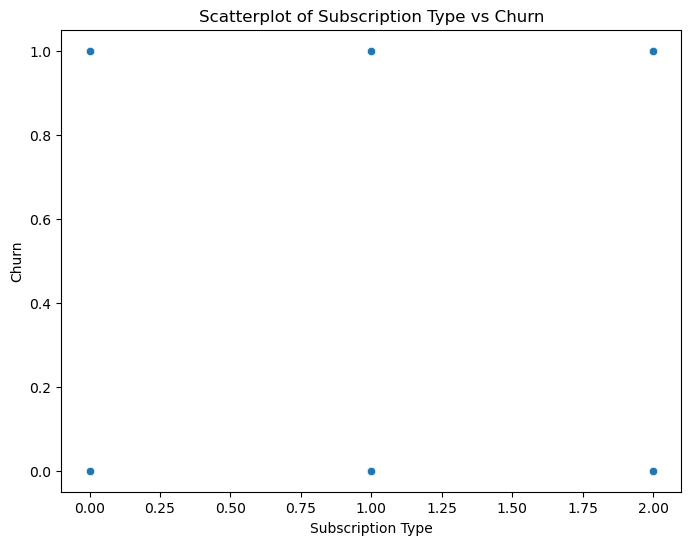

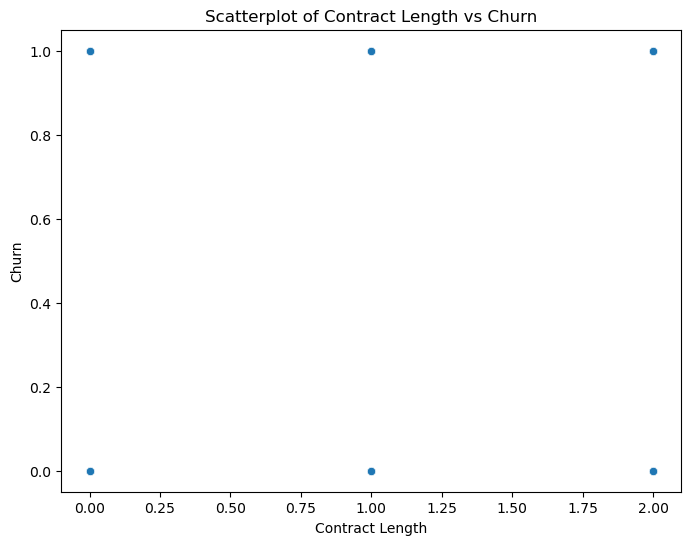

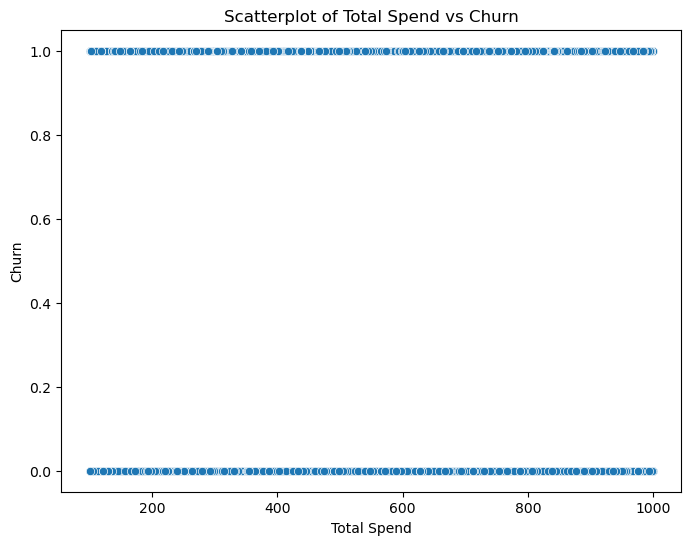

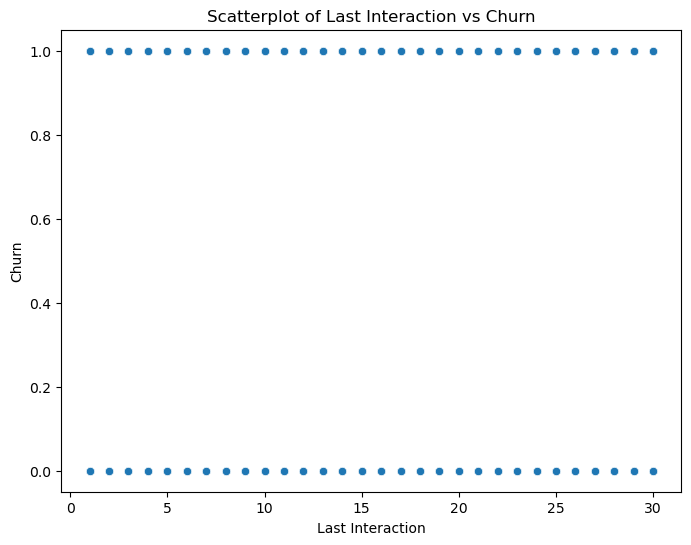

In [130]:
for column in churn.columns:
    if column != 'Churn' and column != 'CustomerID':  # Exclude target and non-numeric variables
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=churn[column], y=y)
        plt.title(f'Scatterplot of {column} vs Churn')
        plt.xlabel(column)
        plt.ylabel('Churn')
        plt.show()

We will perform a logsitic regression to test every factor and see how effective it can be predicting churn

In [23]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.394483
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                64374
Model:                          Logit   Df Residuals:                    64363
Method:                           MLE   Df Model:                           10
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.4297
Time:                        22:58:30   Log-Likelihood:                -25394.
converged:                       True   LL-Null:                       -44531.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.5259      0.074    -75.119      0.000      -5.670      -5.382
Age                   0.0194      0.001     24.048      0.000       0.018       0.021
Gender               -1.1358      0.023    -49.065      0.000      -1.181      -1.090
Tenure                0.0351      0.001     51.504      0.000       0.034       0.036
Usage Frequency      -0.0591      0.001    -45.061      0.000      -0.062      -0.057
Support Calls         0.3294      0.004     80.826      0.000       0.321       0.337
Payment Delay         0.2125      0.002    119.884      0.000       0.209       0.216
Subscription Type    -0.0195      0.014     -1.435      0.151      -0.046       0.007
Contract Length      -0.1610      0.014    -11.920      0.000      -0.187      -0.135
Total Spend          -0.0010   4.31e-05    -23.398      0.000      -0.001      -0.001
Last Interaction     -0.0010      0.001     -0.811      0.418      -0.004       0.001
=====================================================================================
"""

The null hypothesis is $H_0 : \beta_k =0 $ for each coefficient corresponding to independent variable.  
From the logistic regression p-value table we can't reject $H_0$ for Subscription Type and Last Interaction  
as the p - value is above 0.05. Therefore, statistically these factors have no bering on churn. We now need to  
calculate the odds off each other factor which is calculated as $e^\beta$.  
Odds = the % increase/decrease that holding all other factors constant will results in that factor affecting churn

In [92]:
odds = [0.0194, -1.1358, 0.0351, -0.0591, 0.3294, 0.2125, -0.1610, -0.0010]
odds_rate = np.exp(odds)

In [93]:
x1.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

In [94]:
Attributes = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',  'Contract Length', 'Total Spend']

In [95]:
odds_df = pd.DataFrame({'Attributes': Attributes, 'Odds Ratio': odds_rate})
sig_churn_fact = odds_df.sort_values('Odds Ratio', ascending = False)
sig_churn_fact['Odds %'] = (sig_churn_fact['Odds Ratio']-1)*100
sig_churn_fact

,Attributes,Odds Ratio,Odds %
4,Support Calls,1.390134,39.013380
5,Payment Delay,1.236766,23.676611
2,Tenure,1.035723,3.572328
0,Age,1.019589,1.958940
7,Total Spend,0.999000,-0.099950
3,Usage Frequency,0.942613,-5.738750
6,Contract Length,0.851292,-14.870793
1,Gender,0.321165,-67.883491


The odds table summarises nicely which factors have significant effect and which have barely any.  
The biggest factor that positvely affect churn rate (i.e means more customers leave) is support calls.  
An increase in 1 support call to customer support increase odds of a customer churning by 39%.  
Next Payment delays has 23.67% odds, meaning an increase in 1 day paying late means there is a 23.67% chance  
of the cusomter leaving.  
For Gender we had an odds ratio of 0.321165, which means odds of males leaving is lower than females leaving  
by a lot (68% nearly).  
Contract length has a 0.85 odds, meaning the longer the contract there is 15% less chance of them leaving.  
Note this compares contract length from monlthy to quarterly or quartely to yearly, below I will calculate  
monthly to annual.
The more the customer uses the service there is a 5.78% chance of them less likely to leave.  
For tenure, an increase in 1 month with being with the service increases chance they will leave by 3.57%.  
Total spend only has a 1% chance of decreasing churn rate for a 1 unit increase.

In [64]:
month_annual = np.exp(2*-0.1610	)
month_annual

0.7246981903299029

There is a 27.5% chance of someone going from monthly to annual contract not leaving.

In [96]:

new_row= {'Attributes':'month to annual', 'Odds Ratio': np.exp(2*-0.1610), 'Odds %': (np.exp(2*-0.1610	)-1)*100 }


In [97]:
sig_churn_fact.loc[len(sig_churn_fact)]=new_row
sig_churn_fact

,Attributes,Odds Ratio,Odds %
4,Support Calls,1.390134,39.013380
5,Payment Delay,1.236766,23.676611
2,Tenure,1.035723,3.572328
0,Age,1.019589,1.958940
7,Total Spend,0.999000,-0.099950
3,Usage Frequency,0.942613,-5.738750
6,Contract Length,0.851292,-14.870793
1,Gender,0.321165,-67.883491
8,month to annual,0.724698,-27.530181


In [98]:
sig_churn_fact.sort_values('Odds %', ascending = False)

,Attributes,Odds Ratio,Odds %
4,Support Calls,1.390134,39.013380
5,Payment Delay,1.236766,23.676611
2,Tenure,1.035723,3.572328
0,Age,1.019589,1.958940
7,Total Spend,0.999000,-0.099950
3,Usage Frequency,0.942613,-5.738750
6,Contract Length,0.851292,-14.870793
8,month to annual,0.724698,-27.530181
1,Gender,0.321165,-67.883491


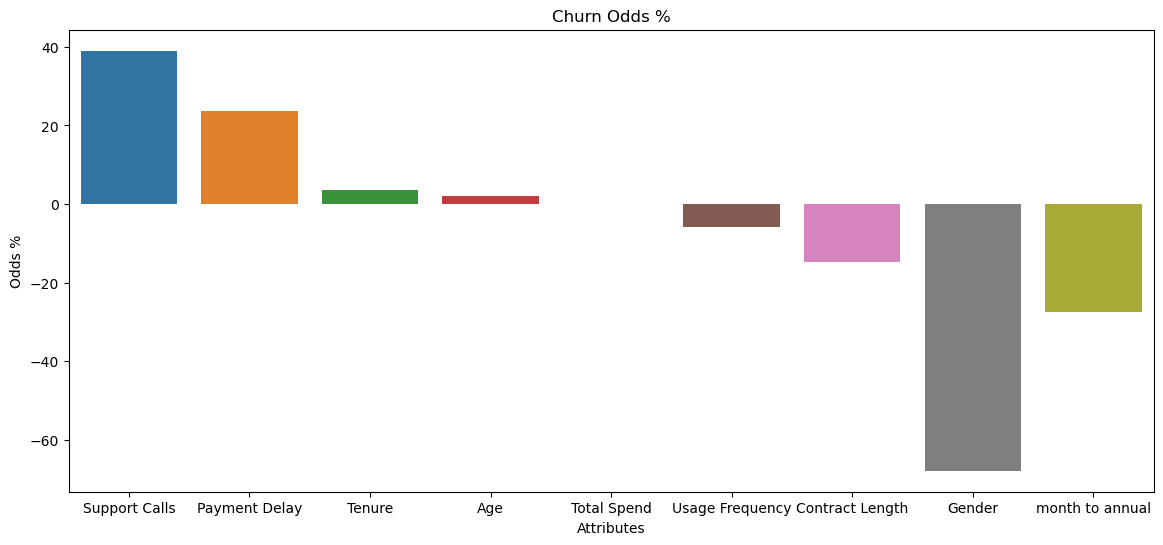

In [104]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Attributes', y = 'Odds %', data = sig_churn_fact)
plt.title('Churn Odds %')
plt.show()

In [162]:
pos_churn = sig_churn_fact[sig_churn_fact['Odds %']> 0]
neg_churn = sig_churn_fact[sig_churn_fact['Odds %']< 0]
neg_churn['Odds %'] = np.abs(neg_churn['Odds %'])

C:\Users\natha\AppData\Local\Temp\ipykernel_11696\4259640459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_churn['Odds %'] = np.abs(neg_churn['Odds %'])


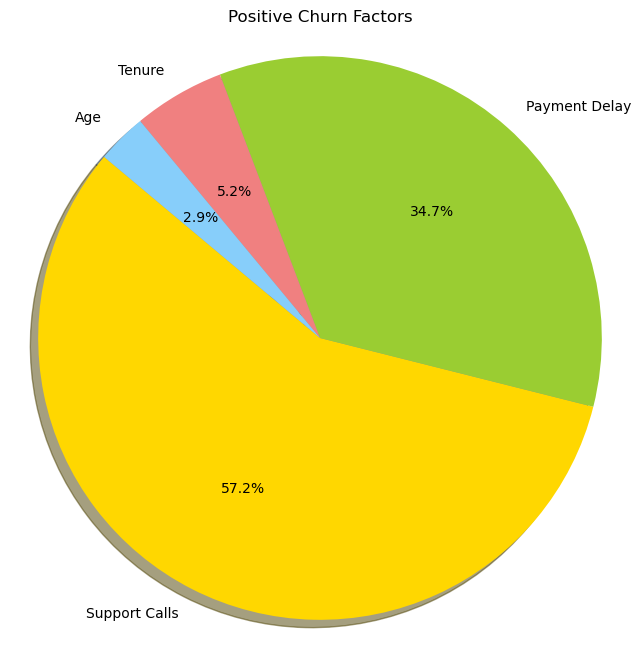

In [154]:

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# Plotting the pie chart with customizations
plt.figure(figsize=(8, 8))
plt.pie(pos_churn['Odds %'],  labels=pos_churn['Attributes'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Positive Churn Factors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

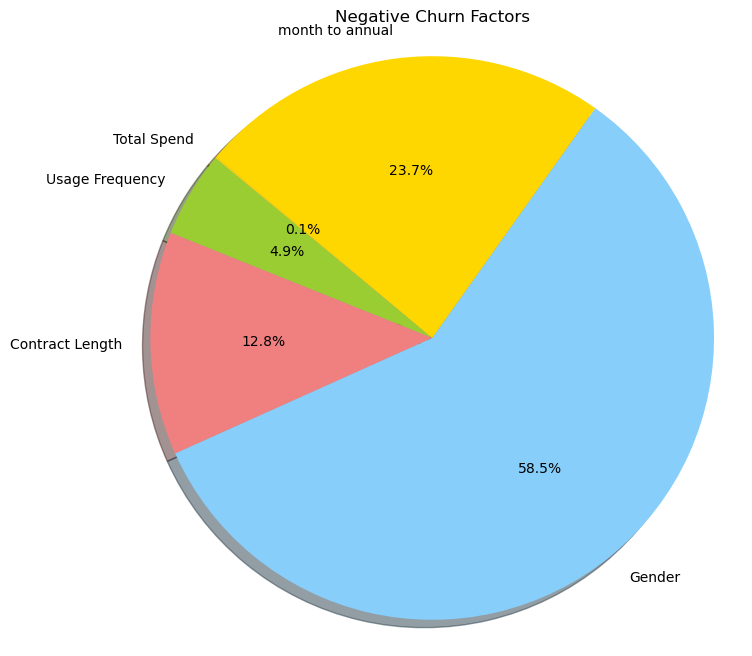

In [160]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# Plotting the pie chart with customizations
plt.figure(figsize=(8, 8))
plt.pie(neg_churn['Odds %'],  labels= neg_churn['Attributes'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Negative Churn Factors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [105]:
results.pred_table()

array([[27987.,  5894.],
       [ 5264., 25229.]])

In [106]:
cm_df = pd.DataFrame(results.pred_table())
cm_df.columns = ['Prediction 0', 'Prediction 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Prediction 0,Prediction 1
Actual 0,27987.0,5894.0
Actual 1,5264.0,25229.0


In [107]:
cm = np.array(cm_df)
accuracy = (cm[0,0]+cm[1,1])/(cm.sum())
accuracy

0.8266691521421692

The confusion matrix shows accuracy of model is 82.67%. I will redo the logistic regression taking out  
insignificant factors plus Total Spend to see if it improves accuracy of model.

In [123]:
y = churn.Churn
x2 = x1.drop(['Last Interaction','Subscription Type' ],axis = 1)
x2.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend
0,22,0,25,14,4,27,0,598
1,41,0,28,28,7,13,0,584
2,47,1,27,10,2,29,2,757
3,35,1,9,12,5,17,1,232
4,53,0,58,24,9,2,2,533


In [124]:
x = sm.add_constant(x2)
reg_log2 = sm.Logit(y,x2)
results2 = reg_log2.fit()

Optimization terminated successfully.
         Current function value: 0.457647
         Iterations 6


In [126]:
results2.pred_table()

array([[25767.,  8114.],
       [ 5966., 24527.]])

In [127]:
cm_df = pd.DataFrame(results2.pred_table())
cm_df.columns = ['Prediction 0', 'Prediction 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Prediction 0,Prediction 1
Actual 0,25767.0,8114.0
Actual 1,5966.0,24527.0


In [128]:
cm = np.array(cm_df)
accuracy = (cm[0,0]+cm[1,1])/(cm.sum())
accuracy

0.7812781557771771

Taking out the other insignificant varaibles has lower accruacy of the model by over 4%.  
Since 82.7% is a good industry benchmark for churn data, and removing other variables descreased accuracy,  
it seems fitting to leave them in and use original model.

I will do further analysis of the groups with small odds on a 1 unit basis

In [195]:
#lets consider age gaps of 10 and analyse
age_churn_group = []
for i in range(1,5):
 age_churn = np.exp(10*i*0.0194)
 age_churn_group.append(age_churn)
age_churn_group

[1.2140962829562332, 1.4740297842881416, 1.789614082071011, 2.1727638049685454]

In [183]:
age_gap = [10,20,30,40]
Age = pd.DataFrame({'Age gap':age_gap , 'Odds':age_churn_group})
Age

,Age gap,Odds
0,10,1.214096
1,20,1.474030
2,30,1.789614
3,40,2.172764


In [186]:
Age['Odds %'] = (Age['Odds']-1)*100
Age.round()

,Age gap,Odds,Odds %
0,10,1.0,21.0
1,20,1.0,47.0
2,30,2.0,79.0
3,40,2.0,117.0


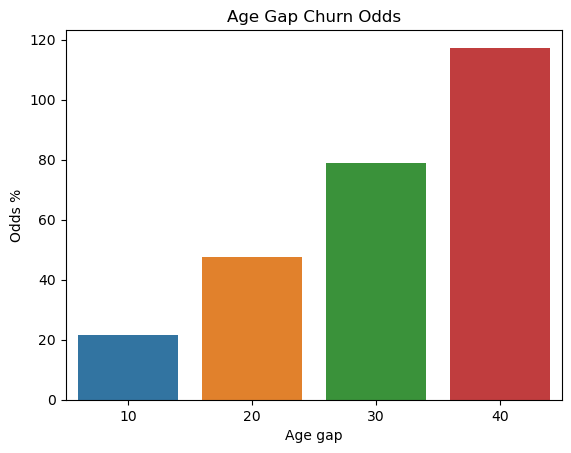

In [193]:
sns.barplot(x = 'Age gap', y = 'Odds %', data=Age)
plt.title('Age Gap Churn Odds')
plt.show()


In [200]:
#lets consider age gaps of 10 and analyse
usage_churn_group = []
for i in range(1,5):
 usage_churn = np.exp(5*i*-0.0591)
 usage_churn_group.append(usage_churn)
usage_churn_group


[0.7441594147231158,
 0.5537732345210501,
 0.41209556609051134,
 0.306664795271906]

In [201]:
usage_gap = [5,10,15,20]
Usage = pd.DataFrame({'Usage gap':usage_gap , 'Odds':usage_churn_group})
Usage

,Usage gap,Odds
0,5,0.744159
1,10,0.553773
2,15,0.412096
3,20,0.306665


In [202]:
Usage['Odds %'] = (Usage['Odds']-1)*100
Usage.round()

,Usage gap,Odds,Odds %
0,5,1.0,-26.0
1,10,1.0,-45.0
2,15,0.0,-59.0
3,20,0.0,-69.0


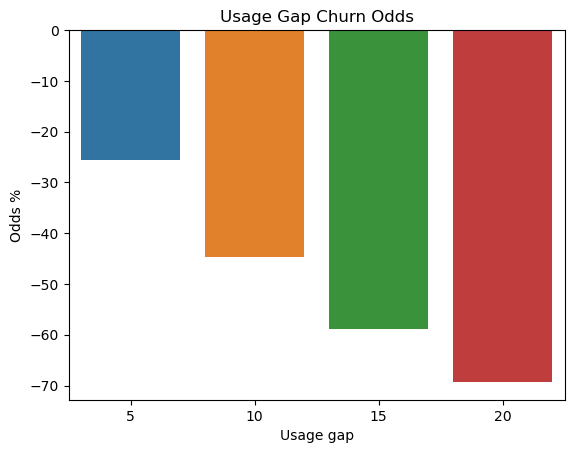

In [204]:
sns.barplot(x = 'Usage gap', y = 'Odds %', data=Usage)
plt.title('Usage Gap Churn Odds')
plt.show()
